# Credit Card Fraud Detection Project Notebook

> By Eng. Ramy Gendy

<a id='Intro'></a>

## Introduction

> Credit card fraud detection (CCFD) is a challenging problem, which requires analyzing large volumes of transaction data to identify fraud patterns. It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

> **Goal:** Learning efficient and accurate ML models for detecting frauds in massive streams of transactions by using `Python 3.8` on `Google Colab` to detect whether a transaction is a normal payment or a fraud.

## Table of Contents:
 * <a href="#Intro">Introduction.</a>
 * <a href="#Investigation Overview">Investigation Overview.</a>
 * <a href="#Dataset Overview & Understanding">Dataset Overview & Understanding.</a>
 * <a href="#Data Preprocessing">Data Preprocessing:</a>
     * Apply Feature Engineering and Extraction:
       - Domain knowledge features.
       - Apply string operations.
       - Work with Text.
     * Apply Feature Transformations: 
       - Data Cleaning.
       - Work with Missing data.
       - Work with Categorical data.
 * <a href="#Exploratory Data Analysis">Exploratory Data Analysis</a>
 * <a href="#Conclusion">Conclusion</a>
 * <a href="#References">References</a>

<a id='Investigation Overview'></a>
## Investigation Overview

> This project will be dealing with **`Credit Card Dataset`** to create various predictive models to see how accurate they are in detecting whether a transaction is a fraud or not.

> Dataset includes:
  * Imbalanced data distributions.
  * Fraudrent Patterns.
  * PCA transformation.
  * Rare data.

> Our project will tackle:
  * Outlier Analysis (Identify Rare data).
  * Dealing with imblanced & skewed class distributions.
  * Detect Fraud Patterns with ML Models:
    * DecisionTree.
    * Random Forest.
    * Xgboost.
    * Logistic Regression.
    * Svm.
    * KNN.
  * ML metrics for model validation.
  * Precision-Recall tradeoff.

 **Questions:**

<a href="#01">01. ?</a>

<a href="#02">02. ?</a>

<a href="#03">03. ?</a>

<a href="#04">04. ?</a>

<a href="#05">05. ?</a>



<a id='Dataset Overview & Understanding'></a>
## Dataset Overview & Understanding

> Overview:
* The dataset contains transactions made by credit cards in September 2013 by European cardholders.
* Due to confidentiality issues, the original features and more background information about the data are not available. 
* This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
* It contains only numerical input variables which are the result of a PCA transformation.

> Starting by:
 * Installing required packages.
 * Importing our Libraries.
 * Importing our dataset from source(Kaggle).
 * Setting Notebook Configurations.
 * Loading and exploring our dataset.
 * Data wrangling & preprocessing

### Installing Packages

### Kaggle Package

> * Will be using Kaggle API to call dataset.
* **_you can skip this part if you already using local machine or uploaded the dataset manually._**

In [9]:
# Install Kaggle Package
# we add ` &> /dev/null ` to silence its output outside of any errors that may arise. 
#!pip install kaggle &> /dev/null

In [2]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "Your_Username" # "Your_Username"
kaggle_key = "you_Kaggle_API_Token" # "you_Kaggle_API_Token"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Importing Librares

> Importing required libraries, config. warnings and display settings.

In [4]:
# Importing libraries
# numpy library use to do array operations and also to do calculations
import numpy as np
# pandas library use to load dataset and also manipulate tabular data
import pandas as pd
# matplot library use to plot different graphs
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
from matplotlib import rcParams

# seaborn library use to plot different plots
import seaborn as sns

In [ ]:
# Ignore matched warnings and never print them
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set display format
rcParams['figure.figsize'] = 12,5
#  Aprox. for float numbers to the neareast 2 decimal points
#pd.options.display.float_format = "{:,.2f}".format
# Settings the display
#pd.set_option("display.max_columns", None)
#pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_rows', None)

### Importing Dataset

> Dataset can be downloaded directly from [kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/download?datasetVersionNumber=3) or Call it directly from Kaggle API

In [5]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle datasets download -d mlg-ulb/creditcardfraud

 88% 58.0M/66.0M [00:00<00:00, 175MB/s]
100% 66.0M/66.0M [00:00<00:00, 174MB/s]


In [6]:
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


### Loading & Explorating Dataset

> Reading using `Pandas` dataframe and exploring & displaying it using `head()` or `tail()`, explore data using statistical summery `describe()`, information summery `info()`, check unique values `unique()` and count them`value_counts()`

In [7]:
# Read dataset
df = pd.read_csv('creditcard.csv')

In [ ]:
# View dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [82]:
# Dataframe shape
df.shape

(284807, 31)

In [30]:
# Columns name
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [92]:
# Information summery
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [93]:
# Statistical summery
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


> Understanding:
 1. Features `V1, V2, … V28` are the principal components obtained with PCA, the only features which have not been transformed with PCA are `Time` and `Amount`.
 2. Feature `Time` contains the seconds elapsed between each transaction and the first transaction in the dataset.
 3. The feature `Amount` is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.
 4. Feature `Class` is the our target variable and it takes value `1` in case of fraud and `0` otherwise.

### Data Wrangling & Preprocessing

1. Data Cleansing:
  * Check missing values.
  * Check duplicated values.

In [34]:
# Check missing values
df.isnull().sum().max()

0

In [94]:
# Check duplicates
df.duplicated().sum()

1081

In [95]:
# display original and duplicated rows
df[df.duplicated(keep=False)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,0.872490,0.851636,-0.571745,0.100974,-1.519772,-0.284376,-0.310524,-0.404248,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,0.872490,0.851636,-0.571745,0.100974,-1.519772,-0.284376,-0.310524,-0.404248,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,0.871800,0.853447,-0.571822,0.102252,-1.519991,-0.285912,-0.309633,-0.403902,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,0.871800,0.853447,-0.571822,0.102252,-1.519991,-0.285912,-0.309633,-0.403902,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,-0.830603,-1.191774,0.942870,1.372621,-0.037988,-0.208490,0.321883,-0.205951,-0.025225,-0.468427,0.023667,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284190,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,-1.449823,-0.508930,0.600035,-0.627313,1.017499,-0.887384,0.420096,1.856497,1.315099,1.096112,-0.821707,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,-1.449823,-0.508930,0.600035,-0.627313,1.017499,-0.887384,0.420096,1.856497,1.315099,1.096112,-0.821707,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284192,172233.0,-2.691642,3.123168,-3.339407,1.017018,-0.293095,-0.167054,-0.745886,2.325616,-1.634651,-1.440241,-0.511918,0.607878,-0.627645,1.023032,-0.888334,0.413444,1.860351,1.316597,1.094512,-0.791037,0.402639,0.259746,-0.086606,-0.097597,0.083693,-0.453584,-1.205466,-0.213020,36.74,0


In [8]:
# drop duplicated values and reset index
df.drop_duplicates(inplace=True, ignore_index=True)

In [97]:
# Check duplicated rows
df.loc[df.duplicated(),:]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


* Dividing dataframe into dependent(target) & independent (features) values.

In [119]:
# Dependent Variables
x = df.iloc[:, -1].values

In [78]:
# Independent Variables
y = df.iloc[:, :-1].values

### Target exploration

In [115]:
# Ratio of fraud '1' and non fraud '0' cases
df['Class'].value_counts()/len(df.index)

0    0.998333
1    0.001667
Name: Class, dtype: float64

Text(0.5, 1.0, 'Class Distributions (0: Not Fraud || 1: Fraud)')

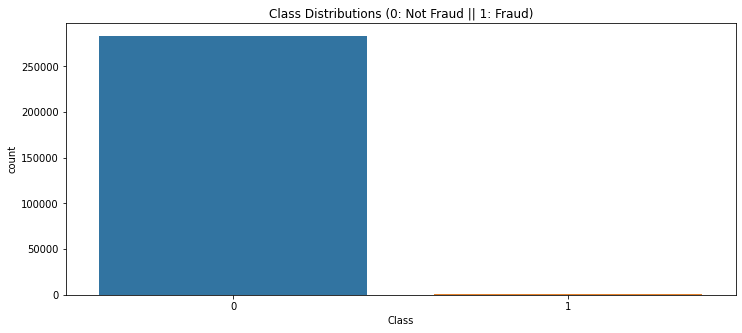

In [101]:
# Plot target distribution
sns.countplot('Class', data=df)
plt.title('Class Distributions (0: Not Fraud || 1: Fraud)', fontsize=12)



**Distributions:** it's clear now dataset is highly unbalanced with skewed features.


In [10]:
# Time statistical summary across fraud and not fraud transactions.
print ("Fraud")
print (df.Time[df.Class == 1].describe())
print ()
print ("Not Fraud")
print (df.Time[df.Class == 0].describe())

Fraud
count       473.000000
mean      80450.513742
std       48636.179973
min         406.000000
25%       41203.000000
50%       73408.000000
75%      129095.000000
max      170348.000000
Name: Time, dtype: float64

Not Fraud
count    283253.000000
mean      94835.058093
std       47475.550607
min           0.000000
25%       54233.000000
50%       84711.000000
75%      139308.000000
max      172792.000000
Name: Time, dtype: float64


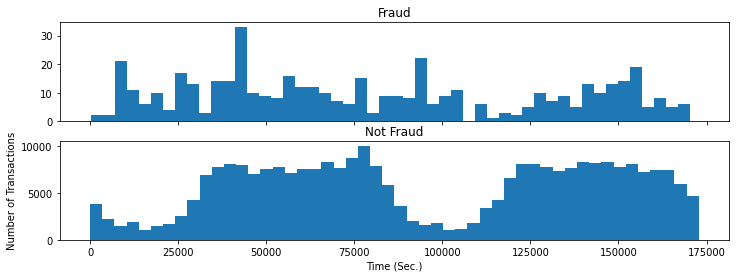

In [28]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')
ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Not Fraud')
plt.xlabel('Time (Sec.)')
plt.ylabel('Number of Transactions')
plt.show()

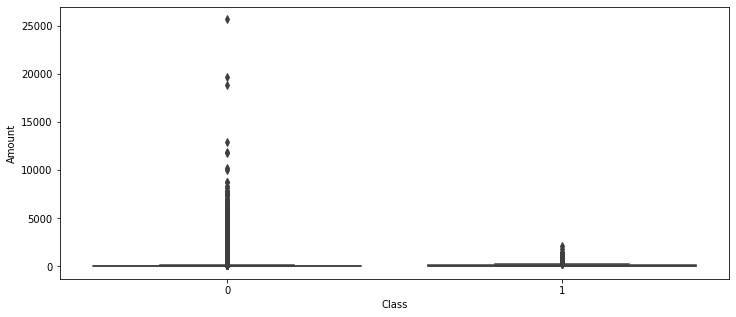

In [15]:
sns.boxplot(data= df, x= 'Class', y = 'Amount');

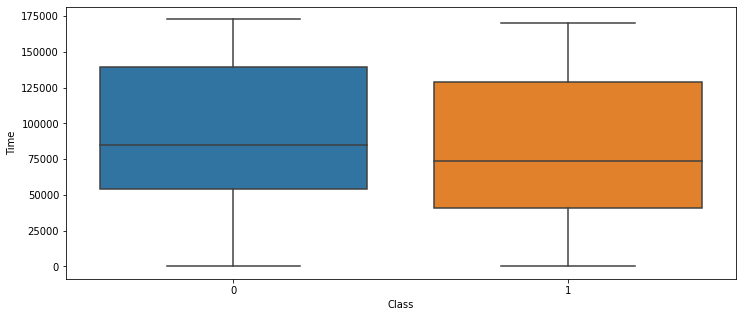

In [29]:
sns.boxplot(data= df, x= 'Class', y = 'Time');

**Skewed data distributions**

* Before deciding out classifier, it's robustness or not depend on the skewness. Risking is ***Overfit*** the dominating class while neglecting all other minor classes which are low in amount.
* The minority class could act as an outlier for the statistical model in imbalanced datasets.
* Outliers adversely affect a model’s performance.
* Ignoring ***Imbalance*** or ***Outliers*** it will lead to poor performance in the minority fraud class, which are our most important result. 
> ***Approach:*** 
> * to solve this problem could be to balance the data.
> * To a process of skewness removal. 
